In [138]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import trapz
from natsort import natsorted

In [2]:
base_dir = './nahui'

In [139]:
def gen_wfn_file():
    for v_folder in natsorted(os.listdir(base_dir)):
        v_path = os.path.join(base_dir, v_folder)

        for b_folder in natsorted(os.listdir(v_path)):
            if b_folder[0] == 'b':
                b_path = os.path.join(v_path, b_folder)
                
            # if os.path.isdir(b_path):
            #     # print(f"{v_folder}/{b_folder}")
                    
                files = os.listdir(b_path)
                for file in files:
                    if file == 'fort.1000':
                        file_path = os.path.join(b_path, file)

                        with open(file_path, 'r') as file:
                            lines = file.readlines()

                            x_vals = []
                            y_vals = []

                            for line in lines:
                              columns = line.split()
                              x_vals.append(float(columns[0]))
                              y_vals.append(float(columns[1]))
                            
                            x_vals_to_int = []
                            y_vals_to_int = []
                
                            for i, x in enumerate(x_vals):
                                if x <= -15:
                                    x_vals_to_int.append(x)
                                    y_vals_to_int.append(y_vals[i])

                            yield v_folder, b_folder, x_vals_to_int, y_vals_to_int

In [168]:
def calc_cross_section():
    v_1_2 = []
    v_1 = []
    v_1415 = []
    v_245 = []
    v_4475 = []
    v_6328 = []
    v1 = []
    v1_414 = []
    v2 = []
    v4 = []
    v6 = []

    for wfn in gen_wfn_file():
        if wfn[0] == 'v=0.1_2':
            v_1_2.append(list(wfn))
        if wfn[0] == 'v=0.1':
            v_1.append(list(wfn))
        if wfn[0] == 'v=0.1415':
            v_1415.append(list(wfn))
        if wfn[0] == 'v=0.245':
            v_245.append(list(wfn))
        if wfn[0] == 'v=0.4475':
            v_4475.append(list(wfn))
        if wfn[0] == 'v=0.6328':
            v_6328.append(list(wfn))
        if wfn[0] == 'v=1':
            v1.append(list(wfn))
        elif wfn[0] == 'v=1.414':
            v1_414.append(list(wfn))
        elif wfn[0] == 'v=2':
            v2.append(list(wfn))
        elif wfn[0] == 'v=4':
            v4.append(list(wfn))
        elif wfn[0] == 'v=6':
            v6.append(list(wfn))

    bs = []
    cross_sections_v1 = []

    for ele in v1: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        b_parts = ele[1].split('=')
        b = float(b_parts[1])
        bs.append(b)
        cross_sections_v1.append(cross_section)

    cross_sections_v1_414 = []

    for ele in v1_414: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v1_414.append(cross_section)

    cross_sections_v2 = []

    for ele in v2: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v2.append(cross_section)

    cross_sections_v4 = []

    for ele in v4: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v4.append(cross_section)

    cross_sections_v6 = []

    for ele in v6: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v6.append(cross_section)

    cross_sections_v_1 = []

    for ele in v_1: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v_1.append(cross_section)
    
    cross_sections_v_1415 = []

    for ele in v_1415: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v_1415.append(cross_section)

    cross_sections_v_245 = []

    for ele in v_245: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v_245.append(cross_section)
    
    cross_sections_v_4475 = []

    for ele in v_4475: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v_4475.append(cross_section)

    cross_sections_v_6328 = []

    for ele in v_6328: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v_6328.append(cross_section)
    
    cross_sections_v_1_2 = []

    for ele in v_1_2: # ele 0 = v, 1 = b, 2 = x, 3 = y
        cross_section = trapz(ele[3], ele[2])
        cross_sections_v_1_2.append(cross_section)

    plt.plot(bs, cross_sections_v1, label='v=1')
    plt.plot(bs, cross_sections_v1_414, label='v=1.414')
    plt.plot(bs, cross_sections_v2, label='v=2')
    plt.plot(bs, cross_sections_v4, label='v=4')
    plt.plot(bs, cross_sections_v6, label='v=6')
    plt.xlabel('b')
    plt.ylabel('cross section')
    plt.title('Straight line traj. p+H')
    plt.legend()
    plt.show()
   
    plt.plot(bs, cross_sections_v_4475, label='v=0.4475')
    plt.plot(bs, cross_sections_v_6328, label='v=0.6328')
    plt.xlabel('b')
    plt.ylabel('cross section')
    plt.title('Straight line traj. p+H')
    plt.legend()
    plt.show()

    plt.plot(bs, cross_sections_v_245, label='v=0.245')
    plt.xlabel('b')
    plt.ylabel('cross section')
    plt.title('Straight line traj. p+H')
    plt.legend()
    plt.show()

    plt.plot(bs, cross_sections_v_1415, label='v=0.1415')
    plt.xlabel('b')
    plt.ylabel('cross section')
    plt.title('Straight line traj. p+H')
    plt.legend()
    plt.show()

    plt.plot(bs, cross_sections_v_1, label='v=0.1')
    plt.xlabel('b')
    plt.ylabel('cross section')
    plt.title('Straight line traj. p+H, dx = 0.4')
    plt.legend()
    plt.show()

    plt.plot(bs, cross_sections_v_1_2, label='v=0.1')
    plt.xlabel('b')
    plt.ylabel('cross section')
    plt.title('Straight line traj. p+H, dx = 0.2')
    plt.legend()
    plt.show()

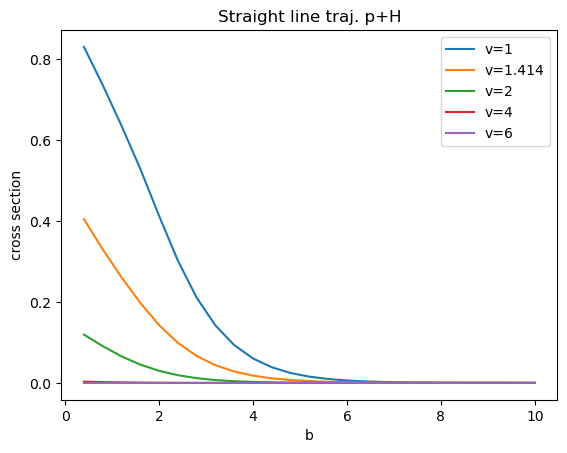

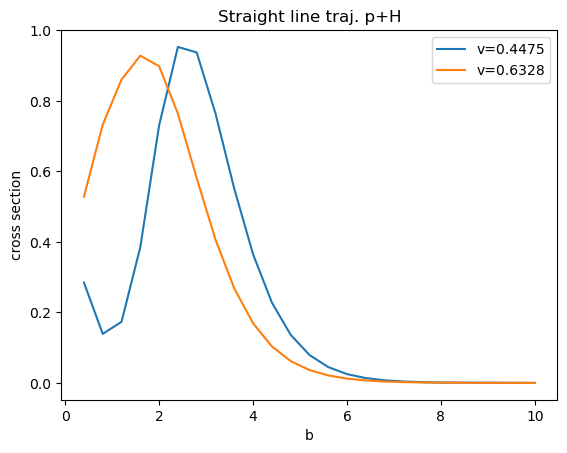

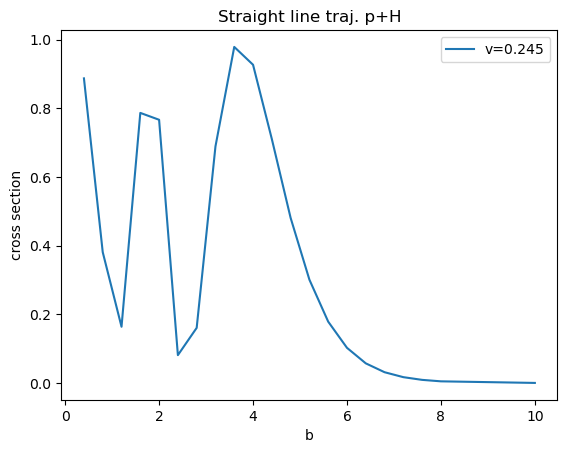

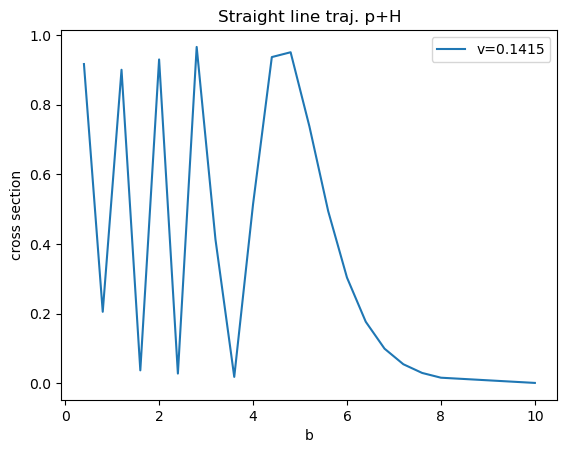

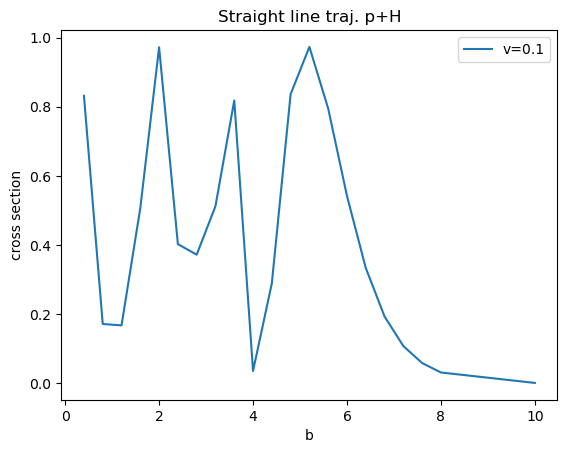

In [169]:
calc_cross_section()